# Get number of pixels clusters example

In [1]:
%matplotlib inline

import numpy as np

import os

import pywicta
from pywicta.io import geometry_converter
from pywicta.io.images import image_generator
from pywicta.io.images import plot_ctapipe_image

from pywi.processing.filtering import pixel_clusters

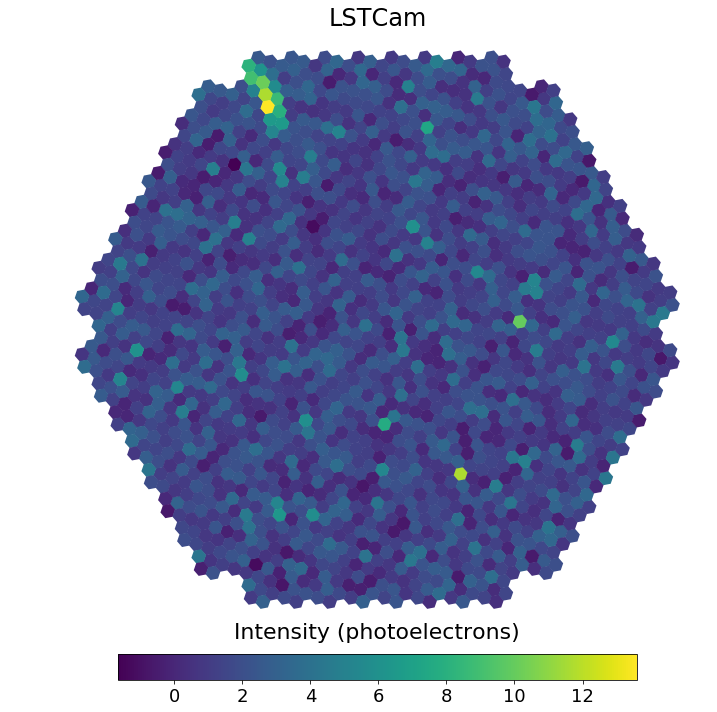

In [2]:
#cam_id = "ASTRICam"
#cam_id = "CHEC"
#cam_id = "DigiCam"
#cam_id = "FlashCam"
#cam_id = "NectarCam"
cam_id = "LSTCam"

#SIMTEL_FILE = "~/data/astri_mini_array_konrad/simtel/astri_v2/gamma/gamma_20deg_180deg_run2203___cta-prod3-sst-astri_desert-2150m-Paranal-sst-astri2.simtel.gz"
#SIMTEL_FILE = "~/data/gct_mini_array_konrad/simtel/gct/gamma/gamma_20deg_180deg_run2203___cta-prod3-sst-gct_desert-2150m-Paranal-sst-gct.simtel.gz"
#SIMTEL_FILE = "~/data/sst1m_mini_array_konrad/simtel/sst1m/gamma/gamma_20deg_180deg_run2203___cta-prod3-sst-dc_desert-2150m-Paranal-sst-dc.simtel.gz"
SIMTEL_FILE = "~/data/grid_prod3b_north/simtel/gamma/gamma_20deg_0deg_run104___cta-prod3-lapalma3-2147m-LaPalma.simtel.gz"

PATHS = [SIMTEL_FILE]
NUM_IMAGES = 1

# Configure image calibration

integrator = 'LocalPeakIntegrator'
integration_correction = False

if cam_id == "ASTRICam":
    integrator_window_width = 1
    integrator_window_shift = 1
elif cam_id == "CHEC":
    integrator_window_width = 10
    integrator_window_shift = 5
elif cam_id == "DigiCam":
    integrator_window_width = 5
    integrator_window_shift = 2
elif cam_id == "FlashCam":
    integrator_window_width = 6
    integrator_window_shift = 3
elif cam_id == "NectarCam":
    integrator_window_width = 5
    integrator_window_shift = 2
elif cam_id == "LSTCam":
    integrator_window_width = 5
    integrator_window_shift = 2
else:
    raise ValueError('Unknown cam_id "{}"'.format(cam_id))

integrator_t0 = None
integrator_sig_amp_cut_hg = None
integrator_sig_amp_cut_lg = None
integrator_lwt = None

# Get an image from a simtel file

it = image_generator(PATHS,
                     max_num_images=NUM_IMAGES,
                     cam_filter_list=[cam_id],
                     ctapipe_format=True,
                     time_samples=False,
                     rejection_criteria=None,
                     integrator=integrator,
                     integrator_window_width=integrator_window_width,
                     integrator_window_shift=integrator_window_shift,
                     integrator_t0=integrator_t0,
                     integrator_sig_amp_cut_hg=integrator_sig_amp_cut_hg,
                     integrator_sig_amp_cut_lg=integrator_sig_amp_cut_lg,
                     integrator_lwt=integrator_lwt,
                     integration_correction=integration_correction)

image = next(it)
input_image = image.input_image

# Plot the image example

geom1d = geometry_converter.get_geom1d(cam_id)
plot_ctapipe_image(input_image, geom=geom1d, plot_axis=False);

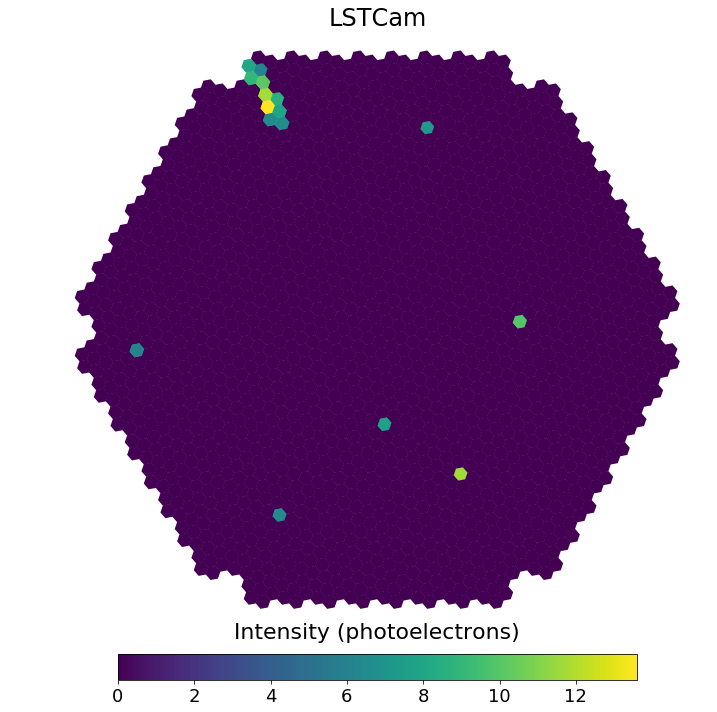

In [3]:
THRESHOLD = 6

filtered_image = np.copy(input_image)
filtered_image[filtered_image < THRESHOLD] = 0
plot_ctapipe_image(filtered_image, geom=geom1d, plot_axis=False);

In [4]:
input_image_2d = geometry_converter.image_1d_to_2d(input_image, cam_id)
num_clusters = pixel_clusters.number_of_pixels_clusters(array=input_image_2d,
                                                        threshold=THRESHOLD)
print("Number of clusters:", num_clusters)

Number of clusters: 7
